   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

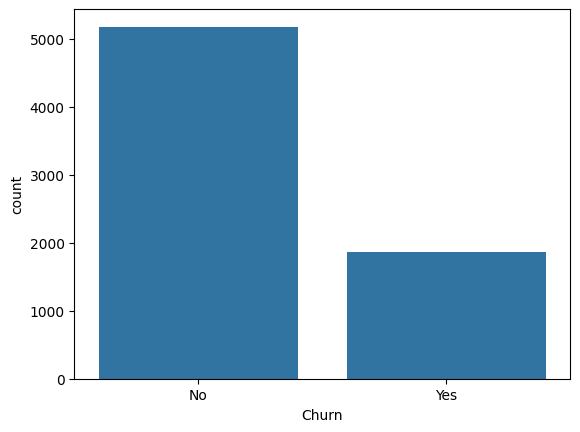

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Analyze the distribution of features
print(df.describe())

# Visualize the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.show()


In [2]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values
df = df.dropna()

# Convert categorical variables to numeric
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Normalize/Standardize the features if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [3]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained successfully.')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained successfully.
KNN trained successfully.
SVM trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'Performance of {name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1-Score: {f1_score(y_test, y_pred):.2f}')
    print(f'ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}\n')


Performance of Logistic Regression:
Accuracy: 0.82
Precision: 0.68
Recall: 0.58
F1-Score: 0.63
ROC-AUC: 0.74

Performance of KNN:
Accuracy: 0.70
Precision: 0.36
Recall: 0.18
F1-Score: 0.24
ROC-AUC: 0.53

Performance of SVM:
Accuracy: 0.74
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
ROC-AUC: 0.50

Performance of Decision Tree:
Accuracy: 0.72
Precision: 0.47
Recall: 0.47
F1-Score: 0.47
ROC-AUC: 0.64

Performance of Random Forest:
Accuracy: 0.80
Precision: 0.67

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Recall: 0.51
F1-Score: 0.58
ROC-AUC: 0.71



In [6]:
from sklearn.model_selection import GridSearchCV

# Example: Grid search for the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_:.2f}')


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy: 0.80


In [7]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold
selector = VarianceThreshold(threshold=0.1)
X_high_variance = selector.fit_transform(X_train)

# Check which features were selected
selected_features = X_train.columns[selector.get_support()]
print(f'Selected features using Variance Threshold: {selected_features}')


Selected features using Variance Threshold: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Apply RFE using Random Forest
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selected features
selected_features_rfe = X_train.columns[rfe.support_]
print(f'Selected features using RFE: {selected_features_rfe}')


Selected features using RFE: Index(['customerID', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [9]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance
print(f'Explained variance ratio by PCA: {pca.explained_variance_ratio_}')


Explained variance ratio by PCA: [9.99997076e-01 7.05415820e-07 3.78431197e-07 2.63859096e-07
 2.16897800e-07]


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [12]:
# Re-train models using RFE-selected features as an example
X_train_selected = X_train[selected_features_rfe]
X_test_selected = X_test[selected_features_rfe]

best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    score = model.score(X_test_selected, y_test)
    print(f'{name} accuracy: {score:.2f}')
    if score > best_score:
        best_model = model
        best_score = score

print(f'Best model: {best_model}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.80
KNN accuracy: 0.69
SVM accuracy: 0.74
Decision Tree accuracy: 0.75
Random Forest accuracy: 0.80
Best model: LogisticRegression()
